In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Load Dataframe
The dataset used in this project is the Bot-IoT dataset, which can be found [here](https://www.kaggle.com/datasets/azalhowaide/iot-dataset-for-intrusion-detection-systems-ids)

In [2]:
dataframe = pd.read_csv('datasets/BoTNeTIoT-L01-v2.csv')
dataframe = dataframe.sample(frac=1).reset_index(drop=True) # shuffle
dataframe.head()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,60.0,0.0,60.000000,0.0,0.0,0.0,Provision_PT_737E_Security_Camera,gafgyt,udp,0
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,60.0,0.0,60.000000,0.0,0.0,0.0,Ennio_Doorbell,gafgyt,tcp,0
2,6452.484346,379.571957,55739.054715,6452.484346,379.571957,55739.054715,4174.346135,553.966795,4.049940,553.966795,...,554.0,0.0,554.000000,0.0,0.0,0.0,Danmini_Doorbell,mirai,udp,0
3,6454.138653,74.772217,571.955813,6454.138653,74.772217,571.955813,6425.468159,73.997020,0.204249,95.265728,...,74.0,0.0,95.268043,0.0,0.0,0.0,SimpleHome_XCS7_1003_WHT_Security_Camera,gafgyt,junk,0
4,6435.297487,445.837523,46360.122101,6435.297487,445.837523,46360.122101,1.000000,60.000000,0.000000,60.000000,...,60.0,0.0,60.000000,0.0,0.0,0.0,Ecobee_Thermostat,mirai,ack,0


## Removing 'Device_Name' column, 'Attack' column and 'label' column

In [3]:
dataframe = dataframe.drop(['Device_Name', 'Attack', 'label'], axis=1)
dataframe.head()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Attack_subType
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.505913e+09,0.000000e+00,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0,udp
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.505914e+09,0.000000e+00,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0,tcp
2,6452.484346,379.571957,55739.054715,6452.484346,379.571957,55739.054715,4174.346135,553.966795,4.049940,553.966795,...,2.070006e-02,2.599258e+07,1.000000,554.0,0.0,554.000000,0.0,0.0,0.0,udp
3,6454.138653,74.772217,571.955813,6454.138653,74.772217,571.955813,6425.468159,73.997020,0.204249,95.265728,...,4.598841e+03,6.925434e+12,1.021795,74.0,0.0,95.268043,0.0,0.0,0.0,junk
4,6435.297487,445.837523,46360.122101,6435.297487,445.837523,46360.122101,1.000000,60.000000,0.000000,60.000000,...,1.507659e+09,0.000000e+00,1.000000,60.0,0.0,60.000000,0.0,0.0,0.0,ack


## Class distribution

In [7]:
print("Number of items in each class: ")
print(dataframe['Attack_subType'].value_counts())

Number of items in each class: 
Attack_subType
udp         2176365
tcp          859850
scan         793090
syn          733299
ack          643821
Normal       555932
udpplain     523304
combo        515156
junk         261789
Name: count, dtype: int64


## Dataset Split

Number of items in each class: 
Attack_subType
udp         2176365
tcp          859850
scan         793090
syn          733299
ack          643821
Normal       555932
udpplain     523304
combo        515156
junk         261789
Name: count, dtype: int64


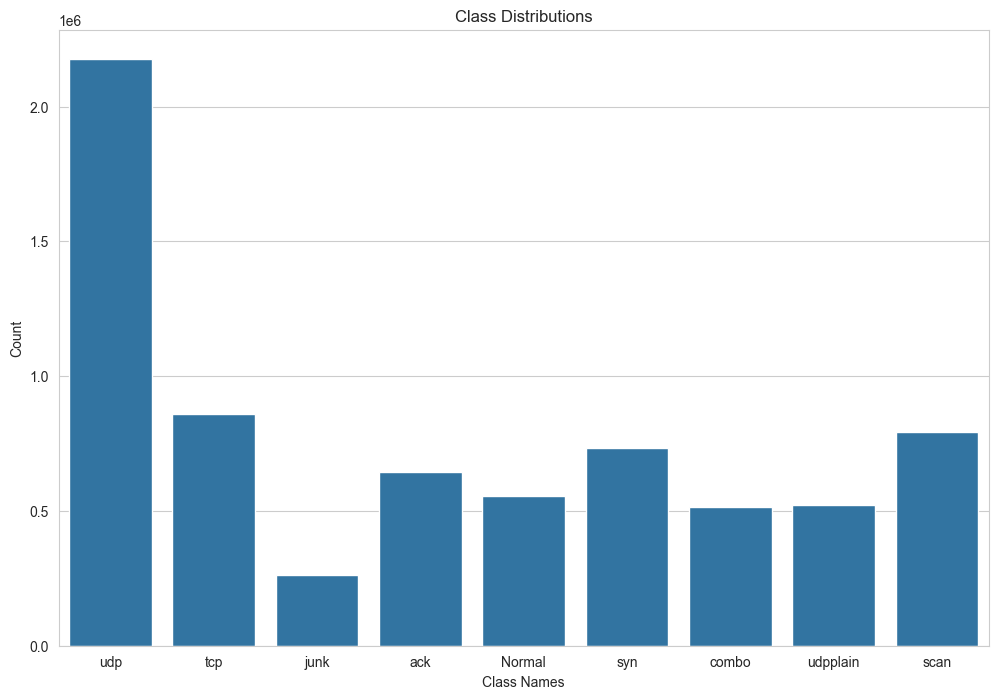

(4943824, 23)
(2118782, 23)


In [6]:
y = dataframe['Attack_subType']
X = dataframe.drop(['Attack_subType'], axis=1)

class_names = np.unique(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42) # 70% training and 30% test

print(X_train.shape)
print(X_test.shape)

## Normalization using StandardScaler()

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Build the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dtc_clf = DecisionTreeClassifier(random_state=42)
dtc_clf.fit(X_train, y_train)

# Make predictions
y_pred = dtc_clf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    166780
         ack       1.00      1.00      1.00    193146
       combo       1.00      1.00      1.00    154547
        junk       1.00      1.00      1.00     78537
        scan       1.00      1.00      1.00    237927
         syn       1.00      1.00      1.00    219990
         tcp       0.97      0.00      0.00    257955
         udp       0.72      1.00      0.84    652909
    udpplain       1.00      1.00      1.00    156991

    accuracy                           0.88   2118782
   macro avg       0.97      0.89      0.87   2118782
weighted avg       0.91      0.88      0.83   2118782


## Get prediction probabilities

In [45]:
y_pred_proba = dtc_clf.predict_proba(X_test)

print(y_pred_proba)

[[0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.47613742 0.52386258 0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]]


## y_test encoded using OneHotEncoder()

In [46]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()

# Encode the class names
int_encoded = le.fit_transform(y_test)
int_encoded = int_encoded.reshape(len(int_encoded), 1)

# OneHotEncode
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(int_encoded)

print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## Evaluation metrics
### Confusion Matrix

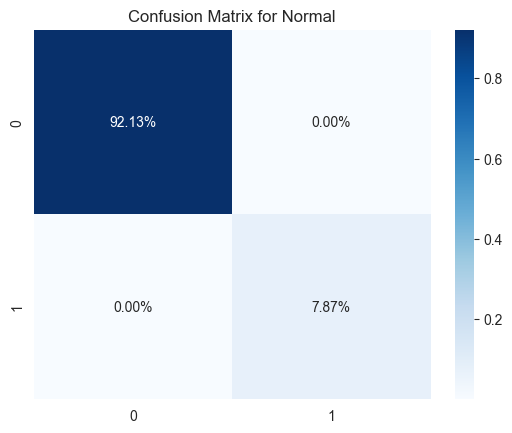

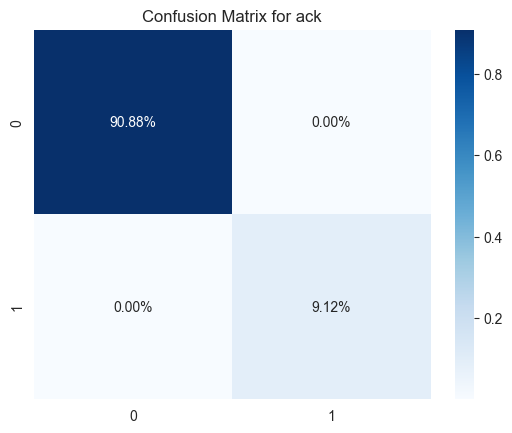

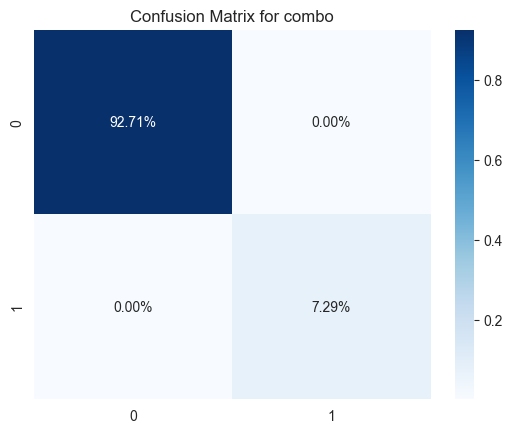

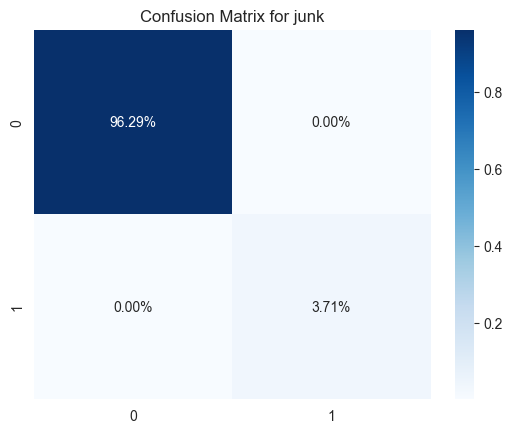

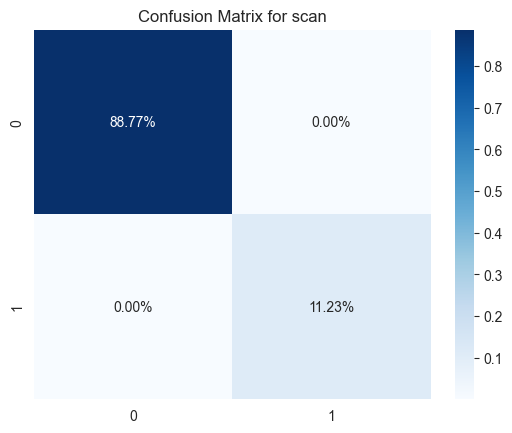

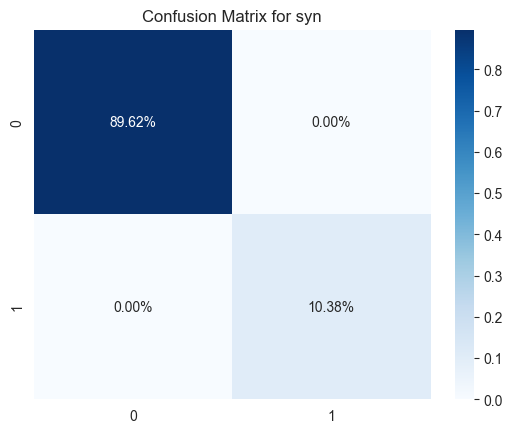

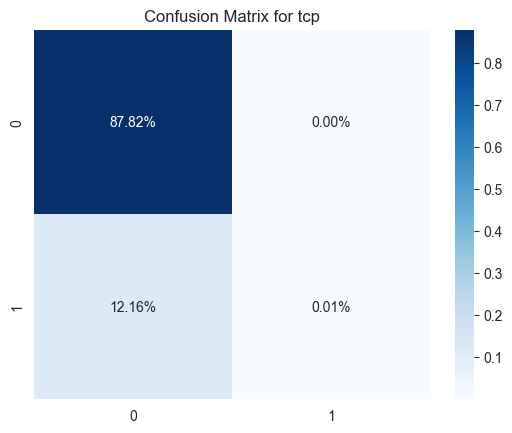

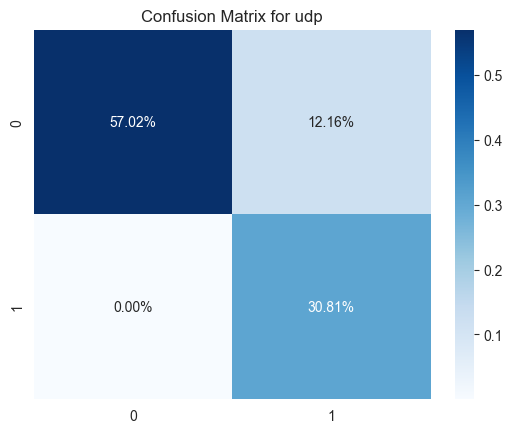

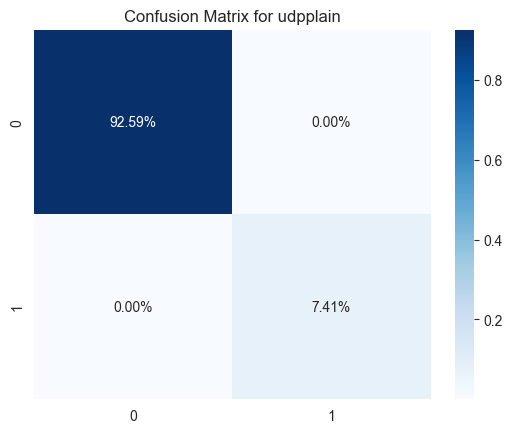

In [47]:
from sklearn.metrics import confusion_matrix

for index in range(len(class_names)):
    cm = confusion_matrix(onehot_encoded[:, index], y_pred_proba[:, index].round())
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.title(f"Confusion Matrix for {class_names[index]}")
    plt.show()

### ROC Curve

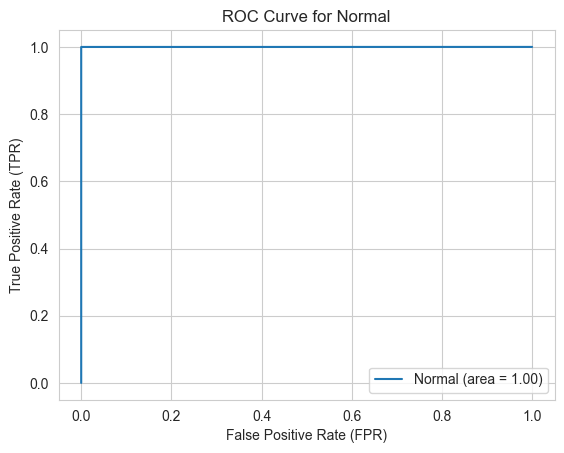

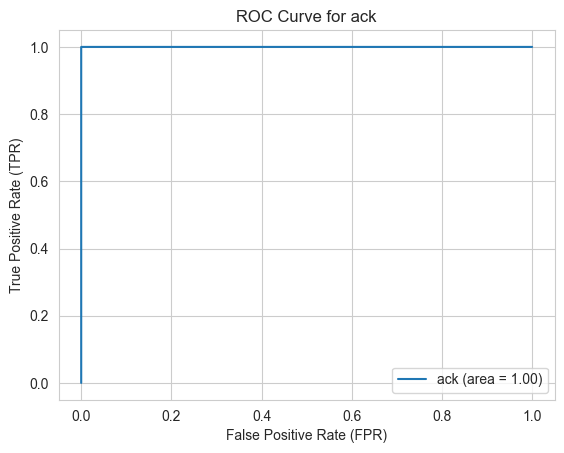

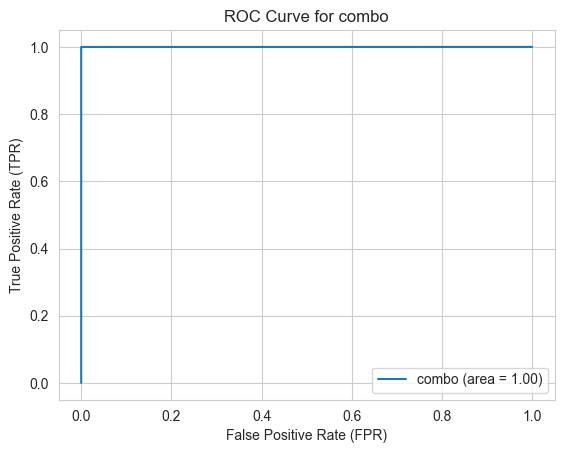

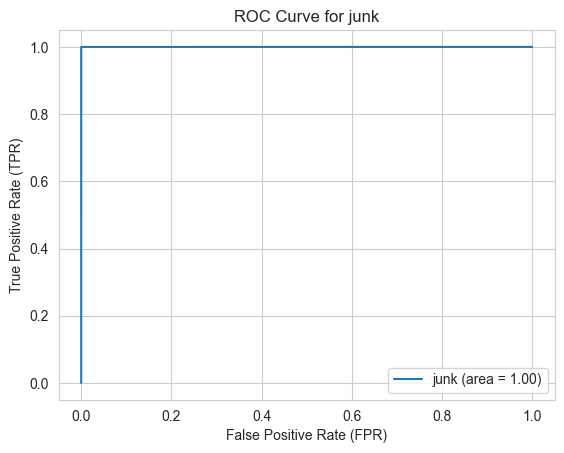

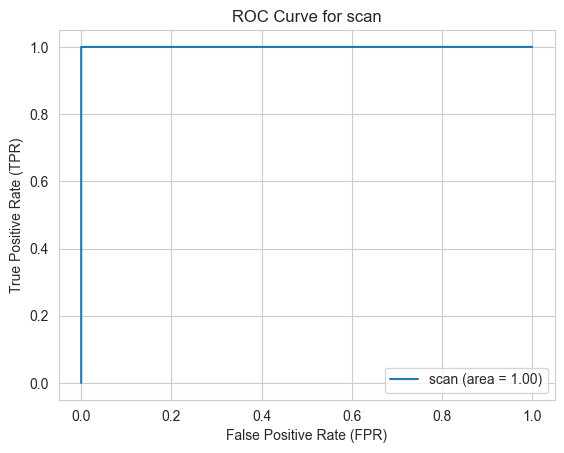

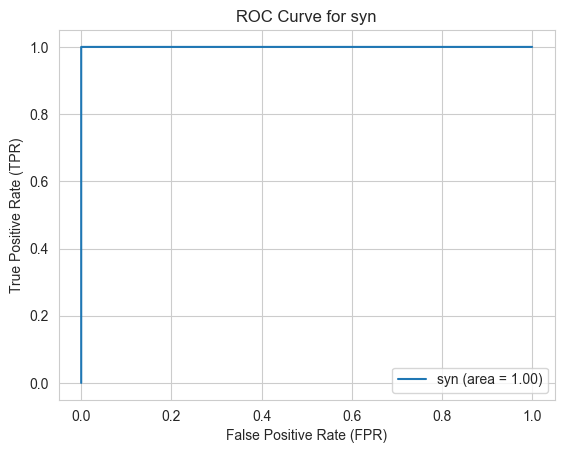

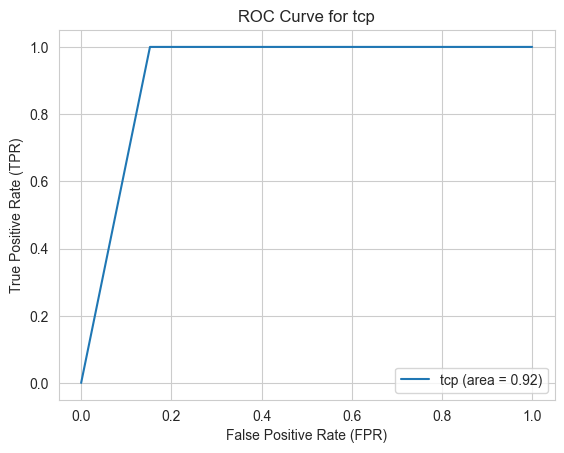

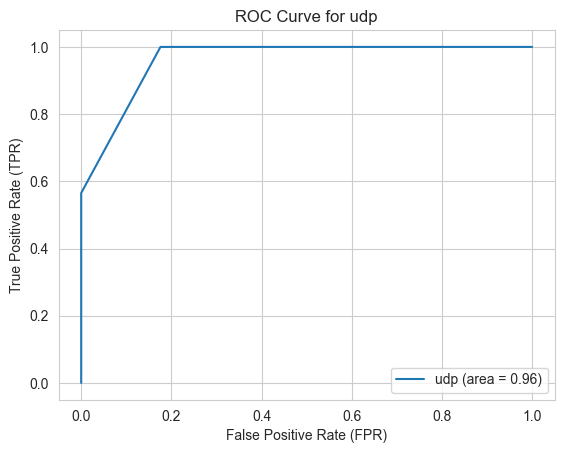

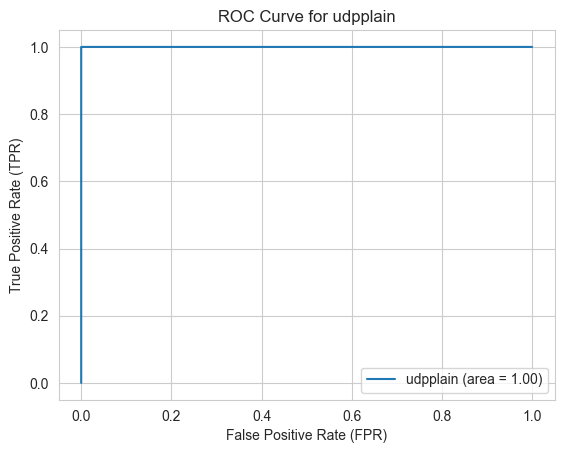

In [48]:
from sklearn.metrics import roc_curve, auc

for index in range(len(class_names)):
    fpr, tpr, thresholds = roc_curve(onehot_encoded[:, index], y_pred_proba[:, index])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[index]} (area = {roc_auc:0.2f})')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {class_names[index]}')
    plt.legend(loc="lower right")
    plt.show()

### Feature importance

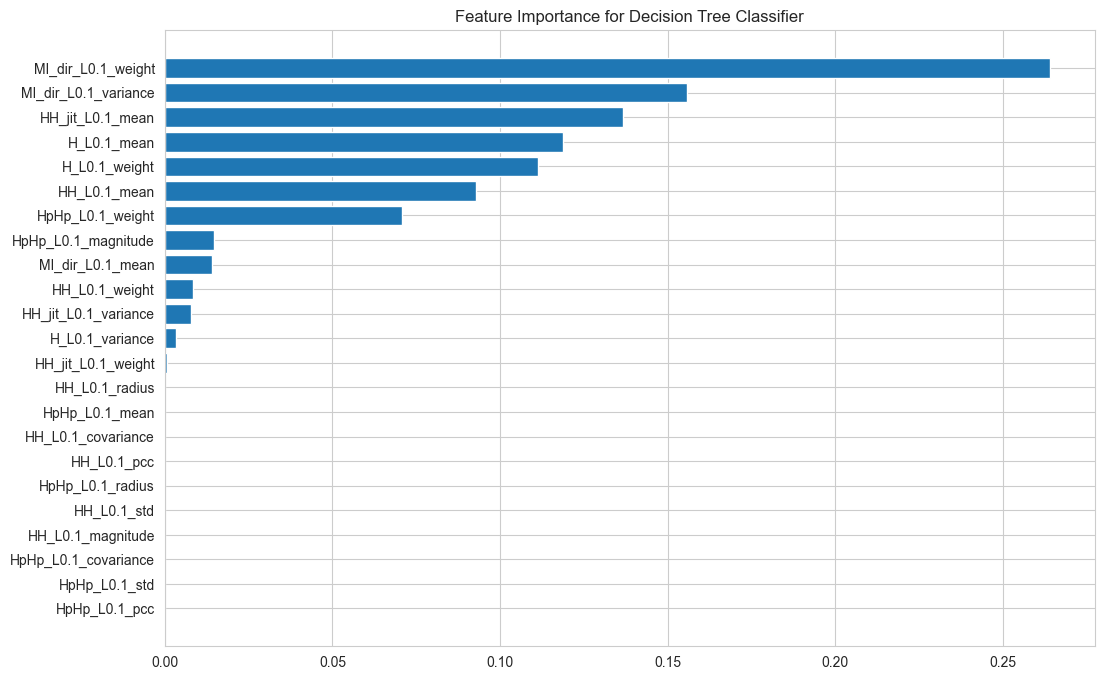

In [49]:
feature_importance = dtc_clf.feature_importances_

# Sort the feature importance in descending order
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance for Decision Tree Classifier')
plt.show()